
# [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster "sklearn.cluster").DBSCAN[](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn-cluster-dbscan "Permalink to this heading")

_class_ sklearn.cluster.DBSCAN(_eps=0.5_,  _*_,  _min_samples=5_,  _metric='euclidean'_,  _metric_params=None_,  _algorithm='auto'_,  _leaf_size=30_,  _p=None_,  _n_jobs=None_)


Parameters:

**eps**float, default=0.5

The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

**min_samples**int, default=5

The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

**metric**str, or callable, default=’euclidean’

The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by  [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances "sklearn.metrics.pairwise_distances")  for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a  [sparse graph](https://scikit-learn.org/stable/glossary.html#term-sparse-graph), in which case only “nonzero” elements may be considered neighbors for DBSCAN.

New in version 0.17: metric  _precomputed_  to accept precomputed sparse matrix.

**metric_params**dict, default=None

Additional keyword arguments for the metric function.

New in version 0.19.

**algorithm**{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

**leaf_size**int, default=30

Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

**p**float, default=None

The power of the Minkowski metric to be used to calculate distance between points. If None, then  `p=2`  (equivalent to the Euclidean distance).

**n_jobs**int, default=None

The number of parallel jobs to run.  `None`  means 1 unless in a  [`joblib.parallel_backend`](https://joblib.readthedocs.io/en/latest/parallel.html#joblib.parallel_backend "(in joblib v1.3.0.dev0)")  context.  `-1`  means using all processors. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-n_jobs)  for more details.


Attributes:

**core_sample_indices_**ndarray of shape (n_core_samples,)

Indices of core samples.

**components_**ndarray of shape (n_core_samples, n_features)

Copy of each core sample found by training.

**labels_**ndarray of shape (n_samples)

Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

**n_features_in_**int

Number of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit).

New in version 0.24.

**feature_names_in_**ndarray of shape (`n_features_in_`,)

Names of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit). Defined only when  `X`  has feature names that are all strings.

In [4]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=0.3,min_samples=6)

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

C:\Users\msi\AppData\Local\Temp\ipykernel_35744\1982912442.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


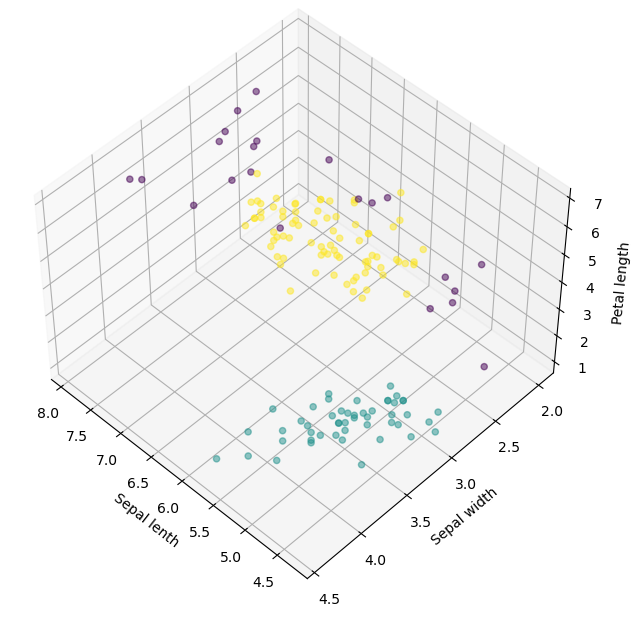

In [6]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()



In [7]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1
labels             
0         1  49   0
1         6   0  44
2        15   0  35
